50% На основании данных рейтинга top500 спрогнозировать  производительность компьютера №1 в 2025


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

In [2]:
columns = ['date', 'sum', 'sum_str', 'top1', 'top1_str', 'top500', 'top500_str']
data = pd.read_csv('development.csv',names=columns, header=None) 

In [3]:
data.head()

,date,sum,sum_str,top1,top1_str,top500,top500_str
0,1993-5-1,1128.57,06/1993: Sum = 1.1 TFlop/s,59.7,06/1993: #1 = 59.7 GFlop/s,0.42,06/1993: #500 = 0.4 GFlop/s]
1,1993-10-1,1493.35,11/1993: Sum = 1.5 TFlop/s,124.0,11/1993: #1 = 124.0 GFlop/s,0.47,11/1993: #500 = 0.5 GFlop/s]
2,1994-5-1,2317.01,06/1994: Sum = 2.3 TFlop/s,143.4,06/1994: #1 = 143.4 GFlop/s,0.84,06/1994: #500 = 0.8 GFlop/s]
3,1994-10-1,2732.24,11/1994: Sum = 2.7 TFlop/s,170.0,11/1994: #1 = 170.0 GFlop/s,1.16,11/1994: #500 = 1.2 GFlop/s]
4,1995-5-1,3927.00,06/1995: Sum = 3.9 TFlop/s,170.0,06/1995: #1 = 170.0 GFlop/s,1.96,06/1995: #500 = 2.0 GFlop/s]


In [4]:
data.tail()

,date,sum,sum_str,top1,top1_str,top500,top500_str
52,2019-5-1,1.559575e+09,06/2019: Sum = 1.6 EFlop/s,148600000.0,06/2019: #1 = 148.6 PFlop/s,1021000.0,06/2019: #500 = 1.0 PFlop/s]
53,2019-10-1,1.646887e+09,11/2019: Sum = 1.6 EFlop/s,148600000.0,11/2019: #1 = 148.6 PFlop/s,1142000.0,11/2019: #500 = 1.1 PFlop/s]
54,2020-5-1,2.206134e+09,06/2020: Sum = 2.2 EFlop/s,415530000.0,06/2020: #1 = 415.5 PFlop/s,1228000.0,06/2020: #500 = 1.2 PFlop/s]
55,2020-10-1,2.428762e+09,11/2020: Sum = 2.4 EFlop/s,442010000.0,11/2020: #1 = 442.0 PFlop/s,1316840.0,11/2020: #500 = 1.3 PFlop/s]
56,2021-5-1,2.786059e+09,06/2021: Sum = 2.8 EFlop/s,442010000.0,06/2021: #1 = 442.0 PFlop/s,1511000.0,06/2021: #500 = 1.5 PFlop/s]


In [5]:
data['date'] = pd.to_datetime(data['date'])

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        57 non-null     datetime64[ns]
 1   sum         57 non-null     float64       
 2   sum_str     57 non-null     object        
 3   top1        57 non-null     float64       
 4   top1_str    57 non-null     object        
 5   top500      57 non-null     float64       
 6   top500_str  57 non-null     object        
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 3.2+ KB


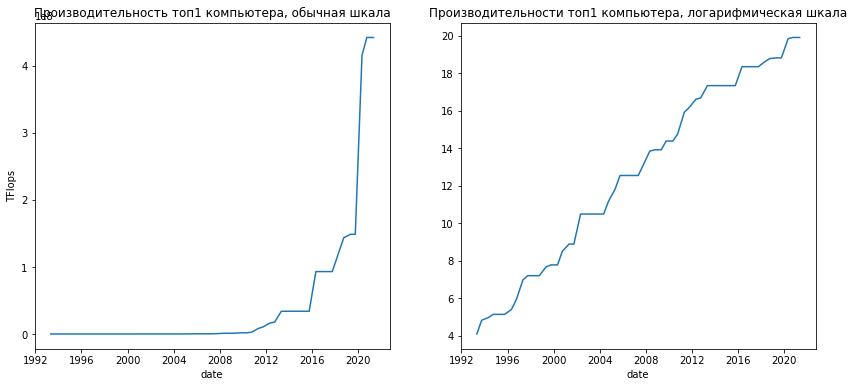

In [7]:
fig,ax = plt.subplots(1,2,figsize=(14,6))
ax[0].plot(data['date'],data['top1'])
ax[0].title.set_text('Производительность топ1 компьютера, обычная шкала')
ax[0].set_xlabel('date')
ax[0].set_ylabel('TFlops')
ax[1].plot(data['date'],np.log(data['top1']))
ax[1].set_xlabel('date')
ax[1].title.set_text('Производительности топ1 компьютера, логарифмическая шкала')

Будем предсказывать логарифм производительности топ1 компьютера с помощью линейной регрессии

In [8]:
model = LinearRegression()
data_train = data.index.to_numpy().reshape(-1, 1)
target = np.log(data['top1'])
model.fit(data_train,target)


data_pred = np.append(data.index.to_numpy(),np.arange(len(data_train),len(data_train)+(2025-2021)*2)).reshape(-1,1)
predicted = model.predict(data_pred)
predicted_flops = np.round(np.exp(predicted[-1]))

Text(0, 0.5, 'development,log scale')

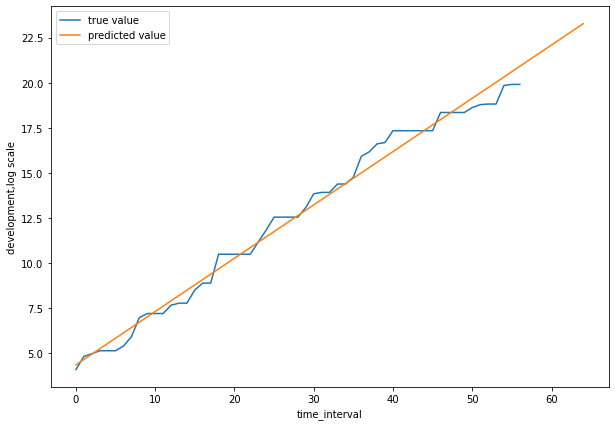

In [9]:
plt.figure(figsize=(10,7))
plt.plot(data_train.reshape(data_train.shape[0]),np.log(data['top1']),label='true value')
plt.plot(data_pred.reshape(data_pred.shape[0]),predicted,label='predicted value')
plt.legend()
plt.xlabel('time_interval')
plt.ylabel('development,log scale')

In [10]:
print(f"Прогноз производительности топ1 компьютера к маю 2025 года: {predicted_flops:,} гигафлопс или {np.round(predicted_flops*0.000001):,} петафлопс")

Прогноз производительности топ1 компьютера к маю 2025 года: 12,816,272,347.0 гигафлопс или 12,816.0 петафлопс


50% оцените какой процент всего производимого на Земле электричества потребляют все компьютеры из top500 (на основании открытых данных top500.org)


In [11]:
top500 = pd.read_csv('TOP500_202106.csv',delimiter=';',decimal=',')

In [12]:
top500.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 38 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Rank                             500 non-null    int64  
 1   Previous Rank                    442 non-null    float64
 2   First Appearance                 500 non-null    int64  
 3   First Rank                       500 non-null    int64  
 4   Name                             322 non-null    object 
 5   Computer                         500 non-null    object 
 6   Site                             500 non-null    object 
 7   Manufacturer                     500 non-null    object 
 8   Country                          500 non-null    object 
 9   Year                             500 non-null    int64  
 10  Segment                          500 non-null    object 
 11  Total Cores                      500 non-null    object 
 12  Accelerator/Co-Process

In [13]:
top500['Power (kW)'] = top500['Power (kW)'].replace(r'\s+', '',regex=True).replace(',', '.',regex=True)
top500['Power (kW)'] = pd.to_numeric(top500['Power (kW)'] )

Заполним пропущенные значения медианой

In [14]:
top500['Power (kW)'] = top500['Power (kW)'].fillna(top500['Power (kW)'].median())

In [15]:
top500_power = np.round(top500['Power (kW)'].sum()*1000)
print(f" Потребление суперкомпьютеров из топ500 приблизительно составляет {top500_power:,} Вт")

 Потребление суперкомпьютеров из топ500 приблизительно составляет 644,855,080.0 Вт


Данный о мировом потребление энергии взяты за 2020 год с сайта https://yearbook.enerdata.ru/electricity/world-electricity-production-statistics.html и составляют 26597 тераватт.

In [16]:
print(f" Потребление суперкомпьютеров из топ500 составляет {top500_power*100/(26597*10**(12)):.7f}% от общемирового потребления энергии.")

 Потребление суперкомпьютеров из топ500 составляет 0.0000024% от общемирового потребления энергии.
